# **PyTorch WorkFlow**

   Notebook created by Ganesh_9124, CSE with major in AI, IIITDM Kancheepuram.

   PyTorch Tutorial:

   https://www.youtube.com/watch?v=V_xro1bcAuA&t=14398s


   PyTorch Workflow:
   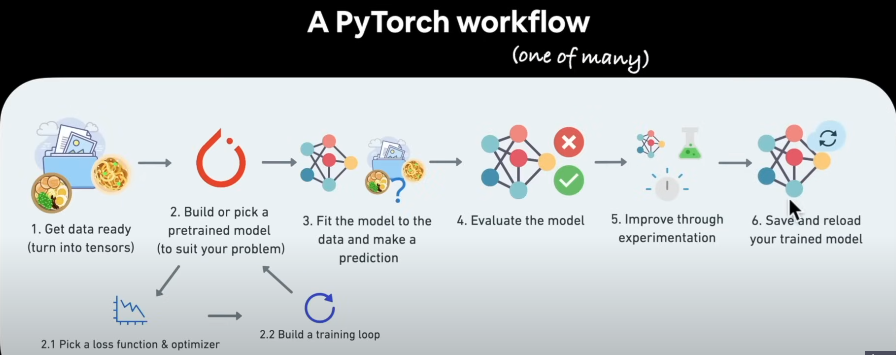


   Topics:

      1. Data preparation and loading
      2. Build model
      3. fitting the model to data (training)
      4. making predictions and evaluating a model
      5. saving and loading a model.
      6. putting it all together.

In [ ]:
# import required libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.__version__

'2.3.0+cu121'

### **1.Data Preparing and Loading**

*   Exel spreadsheet
*   Images of any kind

*   Videos
*   Audio

*   DNA
*   Text


Machine Learning is game of two parts:
  1. Get data into a numerical representation
  2. Build model to learn patterns in that data

In [ ]:
# linear regression

weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.ndim, X.shape, y.ndim, y.shape

(2, torch.Size([50, 1]), 2, torch.Size([50, 1]))

### Spliting data into training and test sets

3 Parts of datasets:


1.   Course material i.e training data
2.   Practise exam i.e validation data - Tune model patterns

1.   Final exam i.e testing data






In [ ]:
# create train test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### matplotlib.pyplot.scatter

A scatter plot of y vs x with varying marker size and/or color.

Documentation link:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html



In [ ]:
# ploting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # plots the training data, test data and compares the predictions

  plt.figure(figsize=(10,10))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')

  # plot testing data in red
  plt.scatter(test_data, test_labels, c='r', s=4, label='testing data')

  if predictions is not None:
    # plot predictions if they exist

    plt.scatter(test_data, predictions, c='g', s=4, label='predictions')

  plt.legend(prop={'size':14});

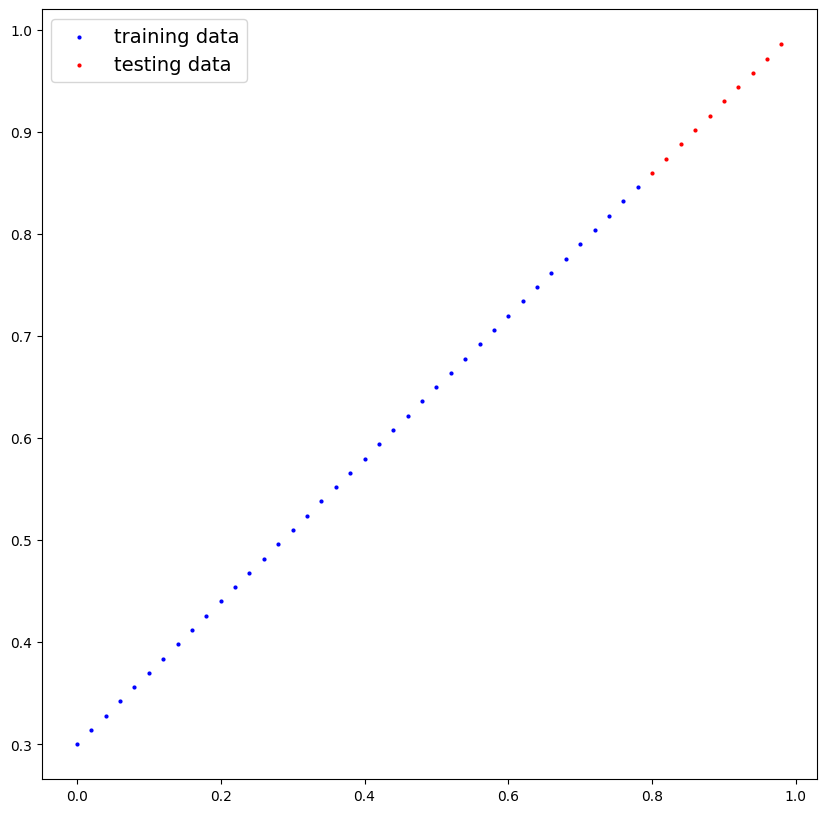

In [ ]:
plot_predictions();

### **2.Build Model**

Reference to Object Oriented Programming in Python:
  https://realpython.com/python3-object-oriented-programming/


**torch.nn.Module:**

  Base class for all neural network models. all our models should also subclass this class.

  Assign submodules as regular attributes.

  for more info:
  https://pytorch.org/docs/stable/generated/torch.nn.Module.html

  for more info about super().__init __() method:
  https://colab.research.google.com/drive/1EiUMzIT-KwmNvHLhSd1YbRtLftU3wPEf#scrollTo=bP0C32CoANJA

what our model does:

* Start with random values of weights and bias.
* Look at training data and adjust the values of weights and bias to better represent/get closer to the ideal values of weights and bias.

How it does so?

Through two main algorithms

* Gradient Descent

  reference:
   https://youtu.be/AeRwohPuUHQ?si=oePXA-fgXln0OxG_
* Backpropagation

  reference: https://youtu.be/lZrIPRnoGQQ?si=7bUVksvp-AXluo5I



**Parameter**

   torch.nn.parameter.Parameter(data=None, requires_grad= True).

  A kind of tensor that is to be considered a module parameter.

  for more info:
  https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [ ]:
# create linear regression model class

class LinearRegression(nn.Module):
  # create constructor
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:   # computation performed for every call
    # x is input data
    return self.weights * x + self.bias

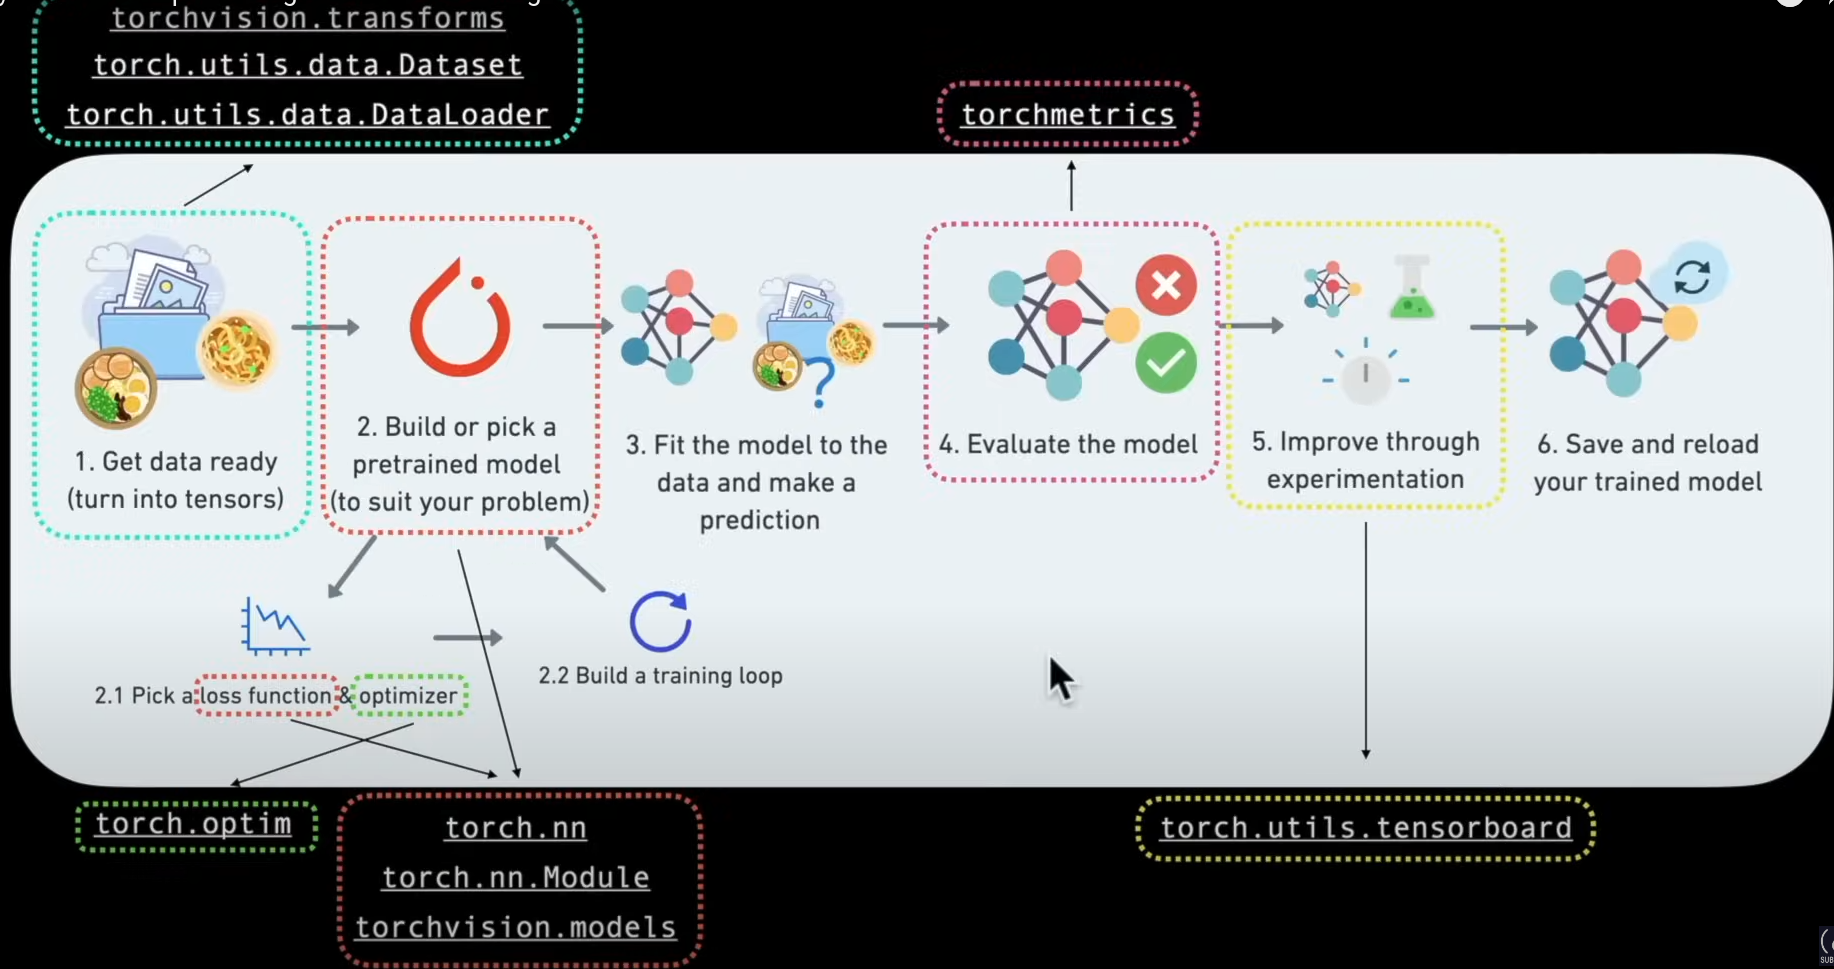### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs , a neural network can be considered as computational graph.
* torch.nn.parameter - what parameter should our model try and learn often layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclass require you to overwrite forward() this method defines what happens in the forward computation.


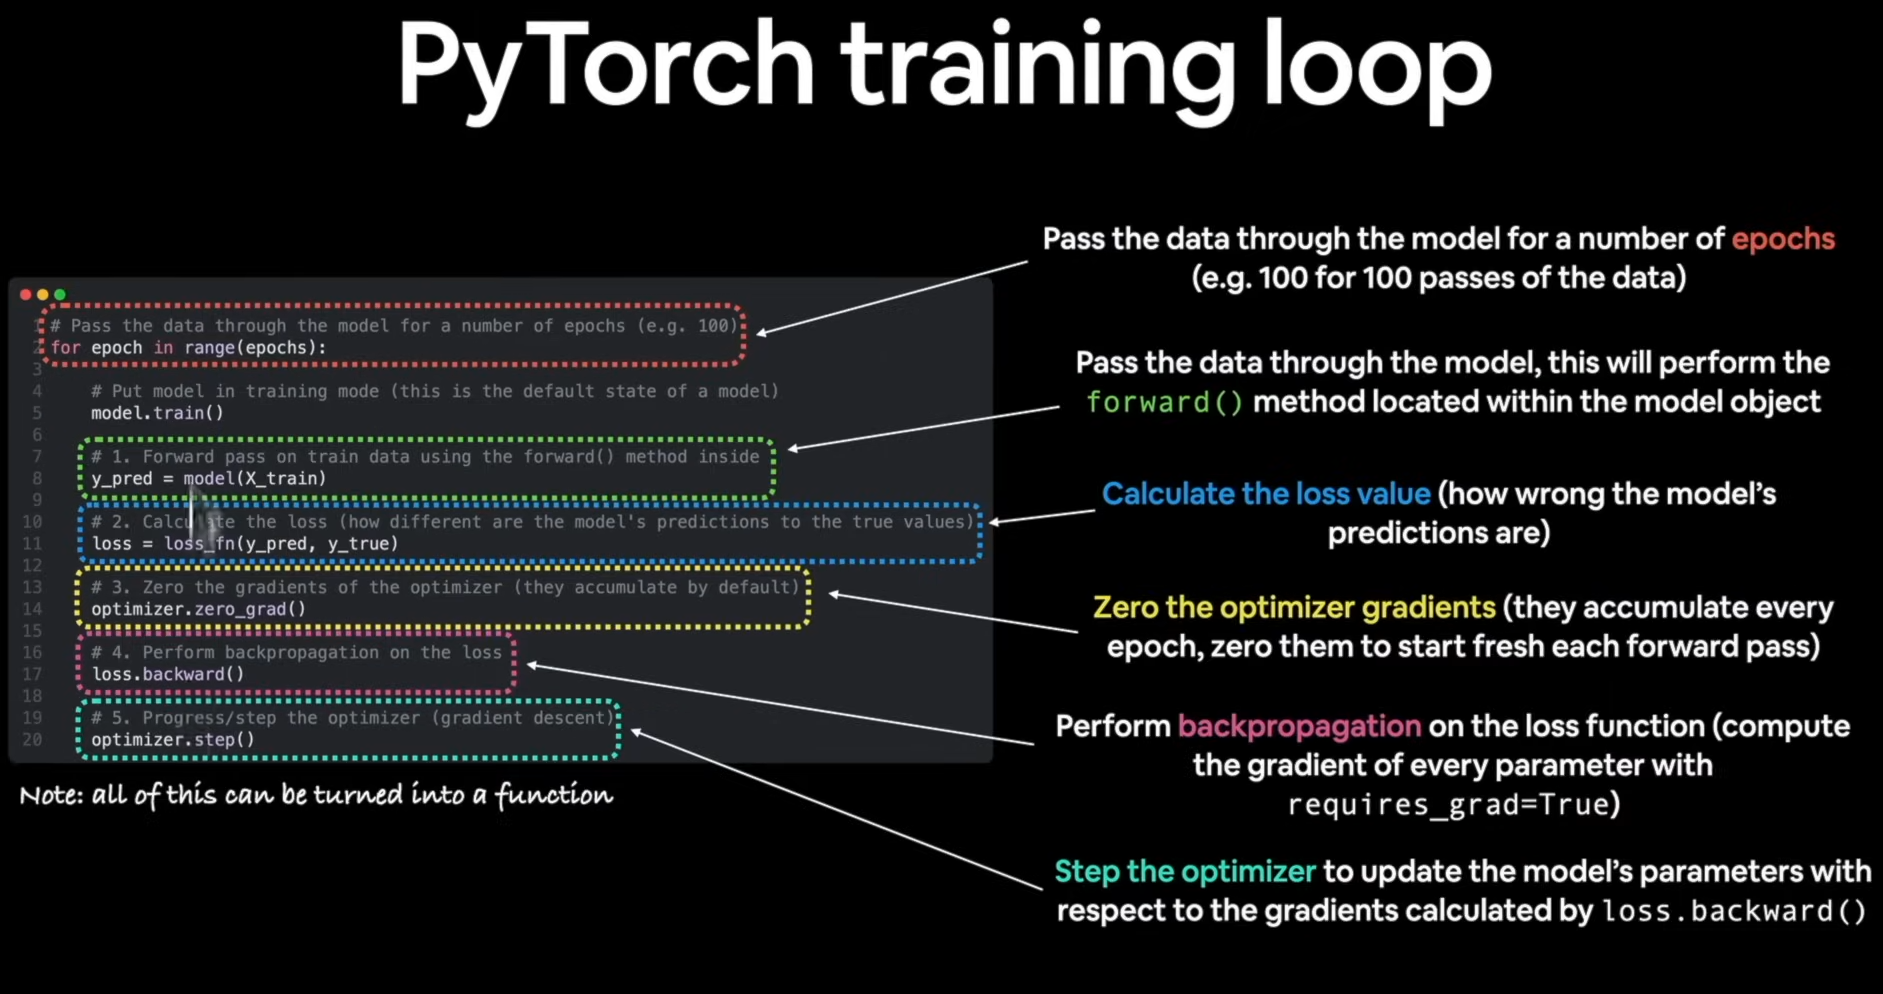

In [ ]:
# create random seed
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **Making prediction using torch.inference_mode()**

To check our models predictive power, we'll use torch.inference_mode()

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

**Inference Mode**

Context manager that enables or disables inference mode.

New context manager anlogous to no_grad.
disables the view of tracking and version counter bumps for performance improvement i.e unnecessary features for this particular phase.


no_grad:
   this ensure that no gradients are computed. this saves memory and speeds up computations.

   but inference_mode() also disables the version counter and other internal tracking mechanisms that are not needed during inference, providing an additional boost in performance.



for more info:
https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html

https://x.com/PyTorch/status/1437838231505096708?lang=en

In [ ]:
# make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# # alternative to inference mode is no_grad

# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

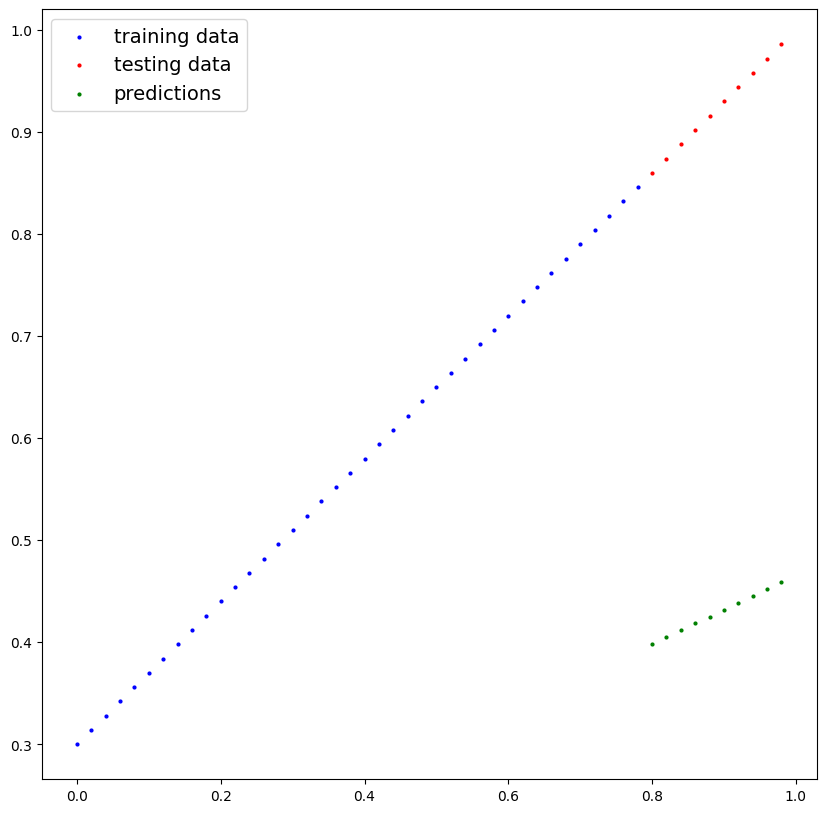

In [ ]:
plot_predictions(predictions=y_preds)

## **3.Train the Model**

Idea of training is for a model to adjust its parameters to make better predictions.


**Loss Functions**:

functions to measure the difference between predicted values and actual ground truth values.

*PyTorch loss functions*:
https://pytorch.org/docs/stable/nn.html#loss-functions

**Optimizer**:

Takes into account the loss of a model and adjusts its parameters to reduce the loss.

  * Inside the optimizer we often have to set two parameters

      * params: the model parameters need to optimise
      * learning_rate: the hyperparameter defines the step size

*PyTorch optimizers*:
https://pytorch.org/docs/stable/optim.html


for PyTorch specifically we need:

* A training loop
* A testing loop

In [ ]:
# check our models parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup loss function

loss_fn = nn.L1Loss()

# set up the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                         lr = 0.01)

### Building training loop in PyTorch

A couple of things we need in training loop:

* loop through data
* Forward Propagation - this involves data moving through our model's forward() method to make predictions.
* Loss calculation - compares the forward pass predictions to ground truth labels
* Optimizer zero grad
* Loss backpropagation - move backwards through neural net to calculate the gradients of each of the parameters of our model with respect to loss (**backpropagation**).
* Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**).


video song of memorizing trick for steps in training loop:
https://www.youtube.com/watch?v=Nutpusq_AFw

In [ ]:
# An epoch is loop through data
epochs = 2000

epoch_count = []
training_loss_values = []
testing_loss_values =[]

# 0. Loop through the data
for epoch in range(epochs):
  ## training

  # set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that requires gradients to require gradients

  epoch_count.append(epoch) # keep track of number of epochs.

  # 1.forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)

  training_loss_values.append(loss)  # keep track of training loss for each epoch

  # 3.Optimizer zero_grad
  optimizer.zero_grad()

  # 4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimization (perform grad descent)
  optimizer.step()   # by default optimizer changes will accumulate the through the loop so.....we have to zero them for next iteration in step 3.

  ## testing

  # put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # 1.forward pass
    test_pred = model_0(X_test)

    # 2.Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    testing_loss_values.append(test_loss) # keep track of testing loss for each epoch.

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0, Loss: 0.31288138031959534, Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10, Loss: 0.1976713240146637, Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20, Loss: 0.08908725529909134, Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30, Loss: 0.053148526698350906, Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40, Loss: 0.04543796554207802, Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50, Loss: 0.04167863354086876, Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60, Loss: 0.03818932920694351, Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 7

In [ ]:
type(training_loss_values[0])

torch.Tensor

### **Plotting training loss and testing loss against number of epochs.**

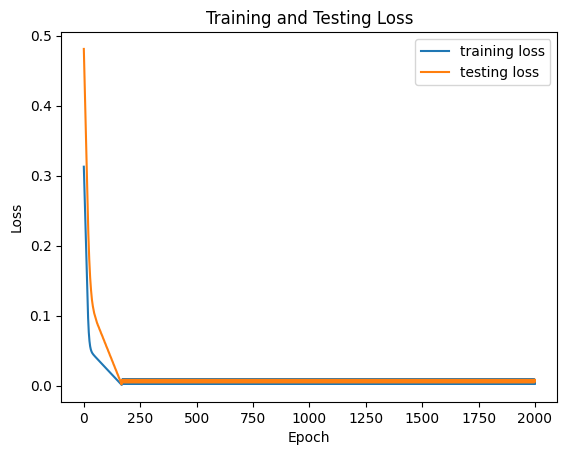

In [ ]:
# plot the training loss and testing loss against the no of the epochs
plt.plot(epoch_count, np.array(torch.tensor(training_loss_values).cpu().numpy()), label = "training loss")
plt.plot(epoch_count, testing_loss_values, label = "testing loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

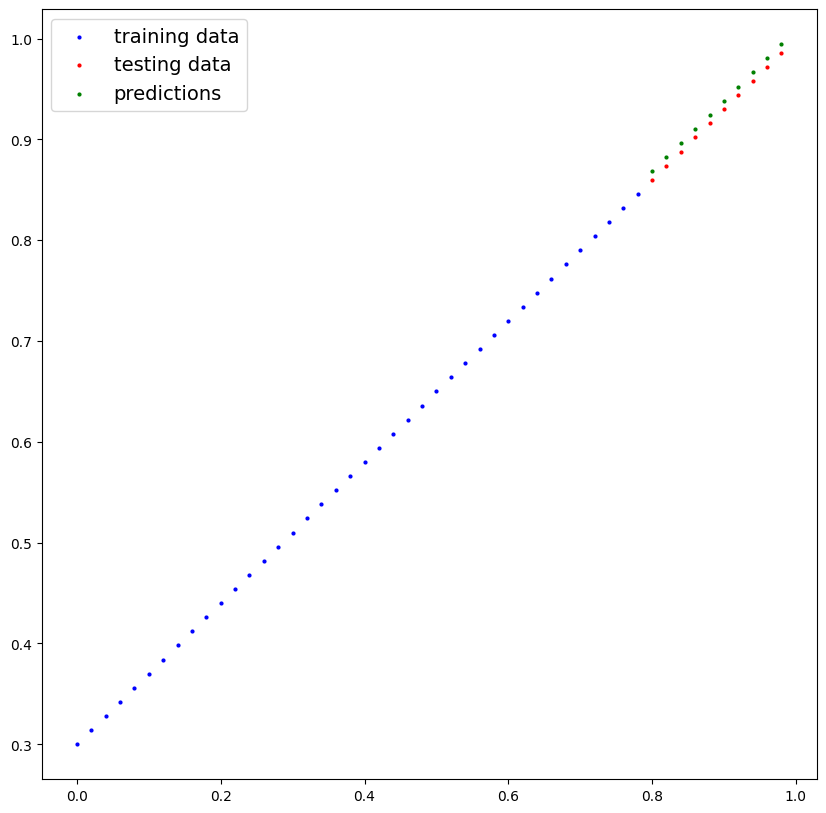

In [ ]:
with torch.inference_mode():
  test_preds = model_0(X_test)
plot_predictions(predictions=test_preds)

## **4.Saving a model in PyTorch**

  There are three main methods about saving and loading models in PyTorch.

  * torch.save() - allows you to save a PyTorch object in Python's pickle format.
  * torch.load() - allows you to load a saved PyTorch object
  * torch.nn.Module.load_state_dict() - allows to load a model's saved state dictionary (recommended)
  

In [ ]:
# saving our PyTorch model
from pathlib import Path

# 1.Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2.Create model save path

MODEL_NAME = "O1_PYTORCH_WORKFLOW_MODEL_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3.Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/O1_PYTORCH_WORKFLOW_MODEL_0.pth


In [ ]:
!ls -l models


total 4
-rw-r--r-- 1 root root 1680 Jun 13 04:27 O1_PYTORCH_WORKFLOW_MODEL_0.pth


## **5.Loading saved PyTorch model**

Since we saved our model's state_dict, rather than entire model, we'll create a new instance of our model class and load the state_dict into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)



In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])